# Survivalibility on Mt. Everest

## Programming for Data Analysis Project 1

## Author: David Higgins - G00411302

"Getting to the top is optional. Getting down is mandatory."

\- Ed Viesturs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

N = 200

We first import the Mt. Everest Ascent dataset to understand what information is available for mountaineers and to get an idea of the shape of that data.

In [2]:
df = pd.read_csv("Mt_Everest_Ascent_Data.csv")
df.head()

,Peak,Name,Year,Season,Date,Time,Citizenship,Sex,Age,Oxy,Dth,Host
0,EVER,Edmund Percival Hillary,1953,Spr,29-May,11:30,New Zealand,M,33,Y,.,Nepal
1,EVER,Tenzing Norgay,1953,Spr,29-May,11:30,India,M,39,Y,.,Nepal
2,EVER,Hans-Rudolf Von Gunten,1956,Spr,24-May,11:00,Switzerland,M,27,Y,.,Nepal
3,EVER,Juerg P. Marmet,1956,Spr,23-May,14:00,Switzerland,M,28,Y,.,Nepal
4,EVER,Ernst Schmied,1956,Spr,23-May,14:00,Switzerland,M,31,Y,.,Nepal


We can create a Data Series containing just the age values. It's then possible to use the describe() method to find out the mean and standard deviation of the ages of summitters.

In [3]:
ages = df.loc[:,'Age']
ages.describe()

count    10010.000000
mean        35.293906
std          9.314089
min         13.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         80.000000
Name: Age, dtype: float64

Plotting a histogram of the age Data Series gives us an idea of the shape of the distribution. This is often the best indicator of what distribution is appropriate when generating synthetic data.

(array([ 151., 1629., 2943., 2221., 1825.,  832.,  296.,   93.,   17.,
           3.]),
 array([13. , 19.7, 26.4, 33.1, 39.8, 46.5, 53.2, 59.9, 66.6, 73.3, 80. ]),
 <BarContainer object of 10 artists>)

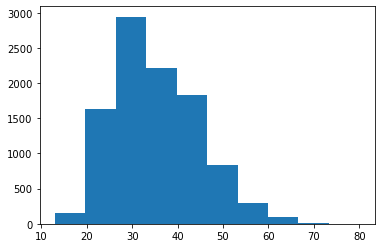

In [4]:
plt.hist(ages, bins=10)

This histogram looks relatively normally distributed. We can try generating a dataset using the mean and standard deviation of the ages Data Series.

[30.39687713 51.2829938  25.92030284 30.43918747 44.95820436 26.88361131
 36.28046123 37.63404941 33.34803023 43.95371992 44.08699473 44.78870162
 13.97862448 40.2245377  19.36488299 26.88129165 33.97174818 28.02035385
 17.91497243 31.39408861 54.25281432 38.67428839 14.58842108 42.06410678
 44.77365937 32.74409594 34.28906669 20.28853321 33.92553031 31.67463617
 18.86586455 36.91184534 49.57186132 45.31906256 34.65205378 31.74042628
 36.13783117 28.95649111 37.93589223 35.11458301 43.06811692 45.00913555
 44.60665546 33.72558293 40.12086255 38.42221124 46.61094734 23.40352391
 45.96978582 30.96210914 41.37452651 39.79067576 45.48021289 36.94273332
 42.67432955 45.61579988 34.14631497 39.09995343 31.8223558  35.00137877
 33.30376659 43.95639686 27.15673549 42.20343105 30.26795041 47.48299935
 26.72672966 45.27350341 44.32493871 43.6289872  32.2123589  31.2765588
 34.8184823  43.70174432 20.11771418 49.91479131 29.84644631 41.73733325
 25.04462152 39.62987753 30.28411238 46.59942931 29.

(array([ 3.,  9., 20., 33., 39., 34., 37., 16.,  5.,  4.]),
 array([ 9.94766577, 15.18203822, 20.41641067, 25.65078313, 30.88515558,
        36.11952803, 41.35390048, 46.58827294, 51.82264539, 57.05701784,
        62.2913903 ]),
 <BarContainer object of 10 artists>)

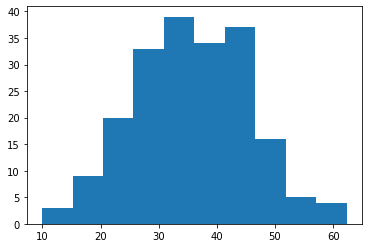

In [5]:
rng = np.random.default_rng()
vals = rng.normal(loc=ages.mean(), scale=ages.std(), size=N)
print(vals)
plt.hist(vals, bins=10)

This appears to be a relatively close approximation of the age Data Series so we will use the variable vals to synthesise age data. Next we consider the probability that a summitter climbed without oxygen. 

In [6]:
noOxygen = df.loc[df.loc[:,'Oxy'] == 'No']
noOxygen.describe()

,Year,Age
count,213.000000,213.000000
mean,2000.680751,35.394366
std,10.407792,6.350187
min,1978.000000,20.000000
25%,1993.000000,31.000000
50%,2001.000000,35.000000
75%,2010.000000,40.000000
max,2019.000000,55.000000


In [7]:
minNoOxAge = noOxygen.Age.mean() - noOxygen.Age.std()*3
maxNoOxAge = noOxygen.Age.mean() + noOxygen.Age.std()*3

print('Minimum age for no oxygen attempt is {} and maximum age is {}.'.format(round(minNoOxAge,2), round(maxNoOxAge,2)))

Minimum age for no oxygen attempt is 16.34 and maximum age is 54.44.


The age range determined using 3 standard deviations either side of the mean is about 16 to 55. Climbing without oxygen is particularly dangerous and the ethics of allowing minors to do this are very debatable. A recent [experiment](https://abcnews.go.com/Health/story?id=2955209&page=1) at Everest Base Camp and the [successful ascent](https://www.nytimes.com/2010/05/20/sports/20climber.html) of a 13 year old show the controversy around the ethics of minors at high altitude. For the purposes of this model we will set the lower limit for not using oxygen as 18 and the upper limit as 55.

In [8]:
noOxPotential = df[(df['Age'] >= 18) & (df['Age'] <= 55)].Age.count() 
noOxPotential

9699

We can look at the historical data to get an idea of the probability that a climber will not use oxygen in their attempt. We can count the number of climbers in total who have used oxygen and divide it by the total number of summitters in the appropriate age range determined above. We can use this probability with the binomial distribution to generate our synthetic data on oxygen use.

In [9]:
noOxProbability = noOxygen.Age.count() / noOxPotential
noOxProbability

0.02196102690999072

In [10]:
synNoOx = rng.binomial(1, noOxProbability)
synNoOx

0

Calculate use of oxygen synthetic data

In [11]:
oxUse = []
for a in vals:
    if a >= 18 and a <= 55:
        oxUse.append(synNoOx)
    else:
        oxUse.append(1)
print(oxUse)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]


Next we calculate the probabilities of climbing in each season.

In [12]:
sprCount = df.loc[df.loc[:,'Season'] == 'Spr'].Season.count()
sumCount = df.loc[df.loc[:,'Season'] == 'Sum'].Season.count()
autCount = df.loc[df.loc[:,'Season'] == 'Aut'].Season.count()
winCount = df.loc[df.loc[:,'Season'] == 'Win'].Season.count()

sprProb = sprCount / df.Season.count()
sumProb = sumCount / df.Season.count()
autProb = autCount / df.Season.count()
winProb = winCount / df.Season.count()

seasProbs = [sprProb, sumProb, autProb, winProb]
seasProbs

[0.9692307692307692,
 0.0008991008991008991,
 0.028371628371628373,
 0.0014985014985014985]

Generate a set of seasons chosen by each climber in the synthetic dataset. We can use the choices method from the random package, with the probabilities above as the weights, to determine a synthetic dataset reflective of the general choices of climbers. It will be heavily dominated by spring but should a couple of attempts in the autumn. Summer and winter are unlikely to feature unless the size of the dataset, N, is quite large.

In [13]:
seas = ['Spr', 'Sum', 'Aut', 'Win']
seasList = []

for i in range(0, N):
    seasChoice = random.choices(seas, weights=seasProbs)
    seasList.append(seasChoice[0])

print(seasList)

['Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Win', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Aut', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr', 'Spr'

Calculate the probabilities of surviving for summitting in each season with and without oxygen. Again we will use these probabilities with the binomial distribution as we are considering a binary choice, either surviving or not.

In [14]:
for i in seas:
    NoOxDeathProb = round(df[(df['Season'] == i) & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == i) & (df['Oxy'] == 'No')].Season.count(),2)
    print('The historical probability of death after summitting when climbing without oxygen in {} is {}'.format(i,NoOxDeathProb))
    OxDeathProb = round(df[(df['Season'] == i) & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                           / df[(df['Season'] == i) & (df['Oxy'] == 'Y')].Season.count(),2)
    print('The historical probability of death after summitting when climbing with oxygen in {} is {}'.format(i,OxDeathProb))


The historical probability of death after summitting when climbing without oxygen in Spr is 0.06
The historical probability of death after summitting when climbing with oxygen in Spr is 0.01
The historical probability of death after summitting when climbing without oxygen in Sum is 0.0
The historical probability of death after summitting when climbing with oxygen in Sum is 0.0
The historical probability of death after summitting when climbing without oxygen in Aut is 0.13
The historical probability of death after summitting when climbing with oxygen in Aut is 0.02
The historical probability of death after summitting when climbing without oxygen in Win is 0.0
The historical probability of death after summitting when climbing with oxygen in Win is 0.07


Compile list with climber number, ages, season and oxygen use.

In [15]:
synEverestData = []

def everestFunction():
    for i in range(0, N):
        data = []
        if oxUse[i] == 0 and seasList[i] == 'Spr':
            death = rng.binomial(1, df[(df['Season'] == 'Spr') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Spr') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Spr':
            death = rng.binomial(1, df[(df['Season'] == 'Spr') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Spr') & (df['Oxy'] == 'Y')].Season.count())

        elif oxUse[i] == 0 and seasList[i] == 'Sum':
            death = rng.binomial(1, df[(df['Season'] == 'Sum') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Sum') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Sum':
            death = rng.binomial(1, df[(df['Season'] == 'Sum') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Sum') & (df['Oxy'] == 'Y')].Season.count())

        elif oxUse[i] == 0 and seasList[i] == 'Aut':
            death = rng.binomial(1, df[(df['Season'] == 'Aut') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Aut') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Aut':
            death = rng.binomial(1, df[(df['Season'] == 'Aut') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Aut') & (df['Oxy'] == 'Y')].Season.count())

        elif oxUse[i] == 0 and seasList[i] == 'Win':
            death = rng.binomial(1, df[(df['Season'] == 'Win') & (df['Oxy'] == 'No') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Win') & (df['Oxy'] == 'No')].Season.count())

        elif oxUse[i] == 1 and seasList[i] == 'Win':
            death = rng.binomial(1, df[(df['Season'] == 'Win') & (df['Oxy'] == 'Y') & (df['Dth'] == 'Y')].Dth.count() \
                               / df[(df['Season'] == 'Win') & (df['Oxy'] == 'Y')].Season.count())

        if oxUse[i] == 1:
            oxUse2 = 'No'
        else:
            oxUse2 = 'Yes'

        if death == 0:
            death2 = 'Survived'
        else:
            death2 = 'Died'


        data = [i, round(vals[i],0), oxUse2, seasList[i], death2]
        synEverestData.append(data)
        synEverestDataDf = pd.DataFrame(synEverestData, columns=['Climber', 'Age', 'Oxygen', 'Season', 'Survived'])
        
    return synEverestDataDf
        

everestFunction()



,Climber,Age,Oxygen,Season,Survived
0,0,30.0,Yes,Spr,Survived
1,1,51.0,Yes,Aut,Survived
2,2,26.0,Yes,Spr,Survived
3,3,30.0,Yes,Spr,Survived
4,4,45.0,Yes,Spr,Survived
...,...,...,...,...,...
195,195,29.0,Yes,Spr,Survived
196,196,57.0,No,Spr,Survived
197,197,46.0,Yes,Spr,Survived
198,198,32.0,Yes,Spr,Survived


In [16]:
synEverestDataDf = pd.DataFrame(synEverestData, columns=['Climber', 'Age', 'Oxygen', 'Season', 'Survived'])

synEverestDataDf.head()

,Climber,Age,Oxygen,Season,Survived
0,0,30.0,Yes,Spr,Survived
1,1,51.0,Yes,Aut,Survived
2,2,26.0,Yes,Spr,Survived
3,3,30.0,Yes,Spr,Survived
4,4,45.0,Yes,Spr,Survived


The number of deaths in this synthetic dataset can be measured against the historicial death rate.

In [17]:
numberOfDeaths = synEverestDataDf[synEverestDataDf['Survived'] == 'Died'].Survived.count()
numberOfDeaths

7

The historical death rate is calculated by:

In [18]:
historicalDeathRate = round(df[(df['Dth'] == 'Y')].Dth.count() / df.Dth.count(),3)
print(historicalDeathRate)

0.008


Our dataset death rate is calculated by:

In [19]:
predictDeathRate = round(synEverestDataDf[(synEverestDataDf['Survived'] == 'Died')].Survived.count() / synEverestDataDf.Survived.count(),3)
print(predictDeathRate)

0.035
